In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

# 1. Reading images using OpenCV

### Function Syntax
retval = cv2.imread( filename[, flags] )
retval: Is the image if it is successfully loaded. Otherwise it is None. This may happen if the filename is wrong or the file is corrupt.

The function has 1 required input argument and one optional flag:
1. filename: This can be an absolute or relative path. This is a mandatory argument.

2. Flags: These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an optional argument with a default value of cv2.IMREAD_COLOR or 1 which loads the image as a color image.

Flags
- cv2.IMREAD_GRAYSCALE or 0: Loads image in grayscale mode
- cv2.IMREAD_COLOR or 1: Loads a color image. Any transparency of image will be neglected. It is the default flag.
- cv2.IMREAD_UNCHANGED or -1: Loads image as such including alpha channel.

In [4]:
# Read image as gray scale.
cb_img = cv2.imread("png-transcheckerboard.png", 0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits
print(cb_img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Display Image attributes

In [5]:
# print the size  of image
print("Image size (H, W) is:", cb_img.shape)

# print data-type of image
print("Data type of image is:", cb_img.dtype)

Image size (H, W) is: (360, 360)
Data type of image is: uint8


### Display Images using Matplotlib

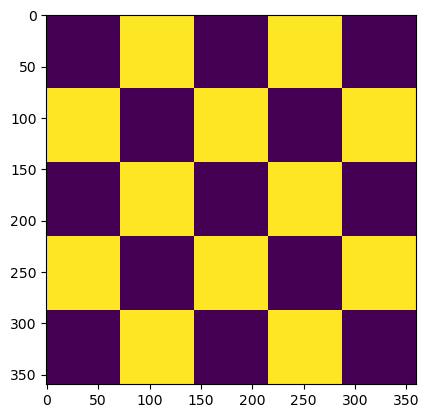

In [6]:
plt.imshow(cb_img)

Even though the image was read in as a gray scale image, it won't necessarily display in gray scale when using imshow(). matplotlib uses different color maps and it's possible that the gray scale color map is not set.

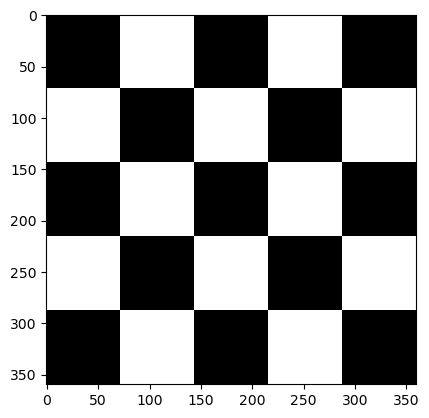

In [7]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")

# 2. Working with Color Images

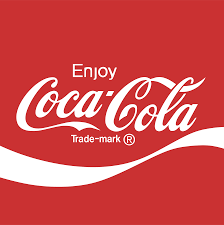

In [8]:
Image("cola.png")

### Read and display color image

In [9]:
# Read in image
coke_img = cv2.imread("cola.png", 1)

# print the size  of image
print("Image size (H, W, C) is:", coke_img.shape)

# print data-type of image
print("Data type of image is:", coke_img.dtype)

Image size (H, W, C) is: (225, 224, 3)
Data type of image is: uint8


### Display the Image using matplotlib

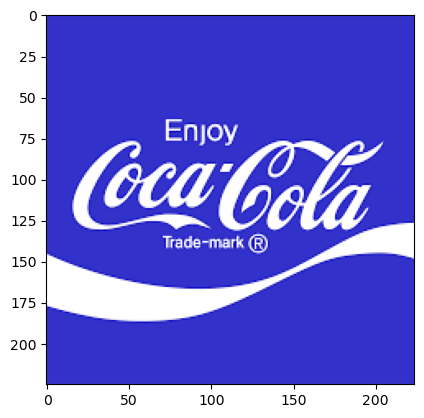

In [10]:
plt.imshow(coke_img)

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

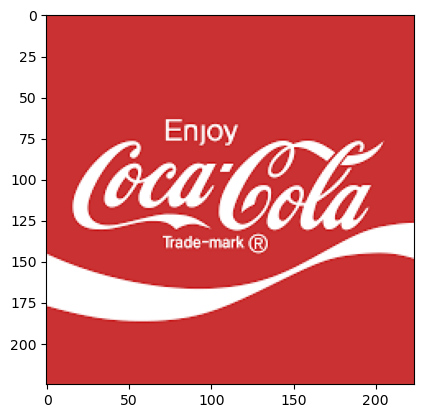

In [11]:
coke_img_channels_reversed = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reversed)

### Splitting and Merging Color Channels

- cv2.split() Divides a multi-channel array into several single-channel arrays.
- cv2.merge() Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

Text(0.5, 1.0, 'Merged Output')

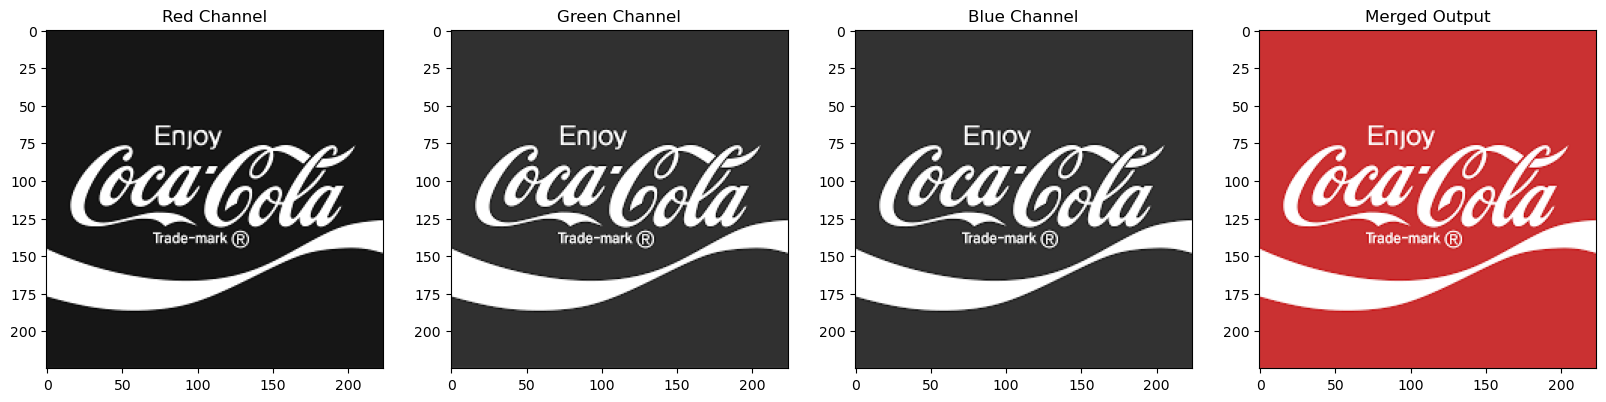

In [12]:
# Split the image into the B,G,R components
cola = cv2.imread("cola.png", cv2.IMREAD_COLOR)
b, g, r = cv2.split(cola)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

### Converting to different Color Spaces
cv2.cvtColor() Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

Function Syntax
dst = cv2.cvtColor( src, code )

The function has 2 required arguments:
- src input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.
- code: color space conversion code (see ColorConversionCodes).

### Changing from BGR to RGB

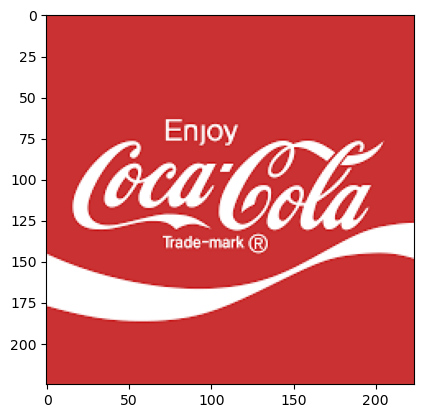

In [13]:
cola_rgb = cv2.cvtColor(cola, cv2.COLOR_BGR2RGB)
plt.imshow(cola_rgb)

### Changing to HSV color space

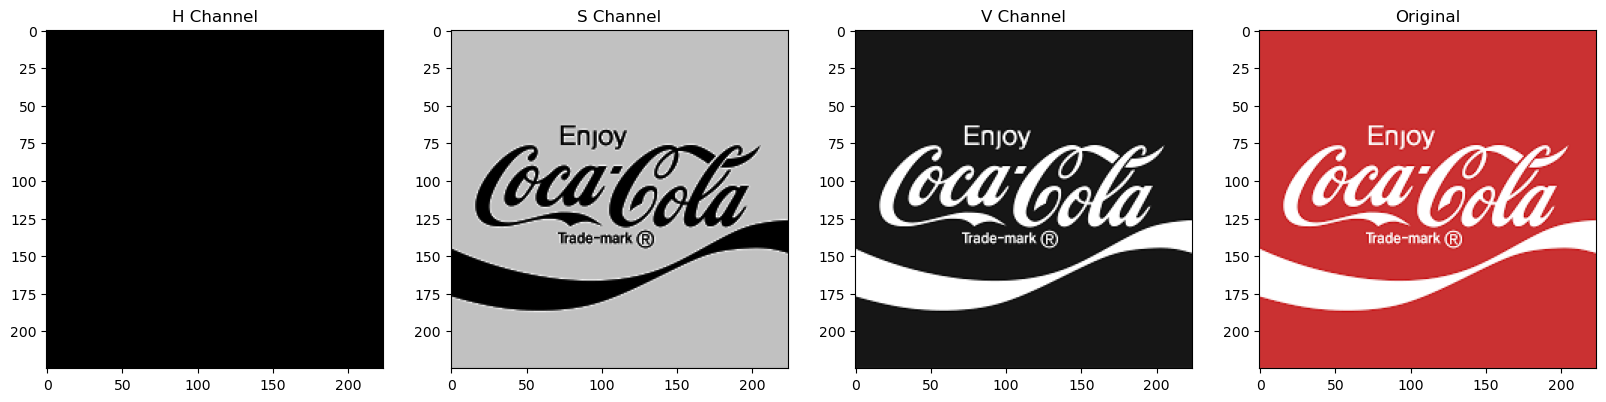

In [15]:
img_hsv = cv2.cvtColor(cola, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(cola_rgb);   plt.title("Original");

### Modifying individual Channel

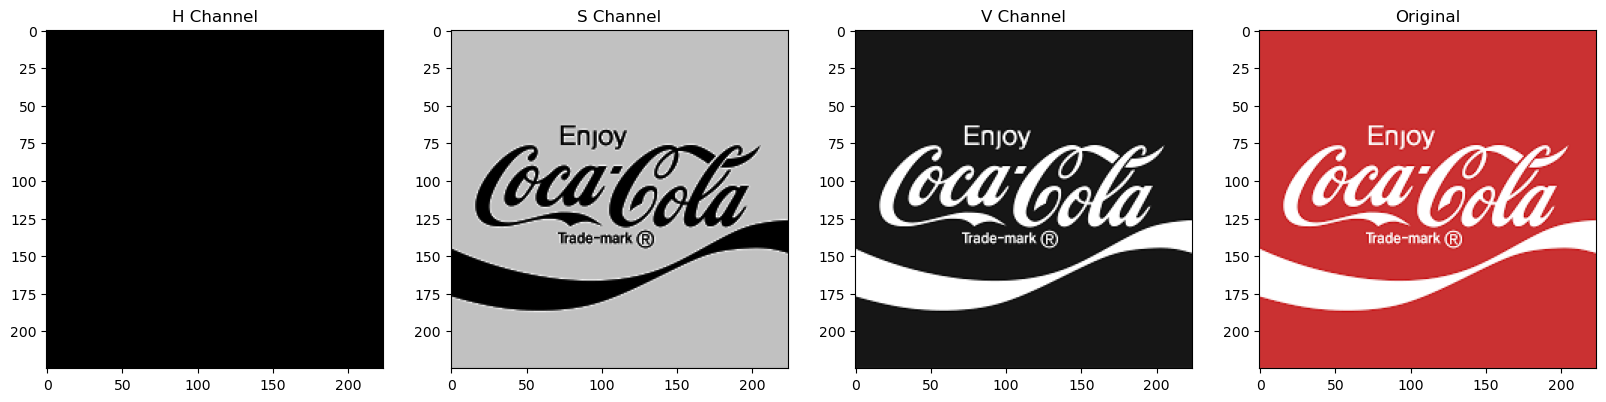

In [17]:
h_new = h + 10
img_cola_merged = cv2.merge((h_new, s, v))
img_cola_rgb = cv2.cvtColor(img_cola_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(cola_rgb);   plt.title("Original");

# 3. Saving Images

Saving the image is as trivial as reading an image in OpenCV. We use the function cv2.imwrite() with two arguments. The first one is the filename, second argument is the image object.
The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function 

- Function Syntax:
cv2.imwrite( filename, img[, params] )

The function has 2 required arguments:
- filename: This can be an absolute or relative path.
- img: Image or Images to be saved.

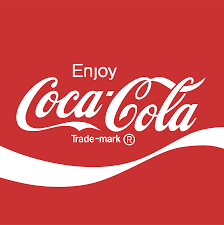

In [18]:
cv2.imwrite("SAVED.png", cola)

Image(filename='SAVED.png') 

In [19]:
# read the image as Color
a1 = cv2.imread("SAVED.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape (H, W, C) is:", a1.shape)

# read the image as Grayscaled
a2 = cv2.imread("SAVED.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape (H, W) is:", a2.shape)

img_NZ_bgr shape (H, W, C) is: (225, 224, 3)
img_NZ_gry shape (H, W) is: (225, 224)
